<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/7_4_Advanced_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

             message: Optimization terminated successfully.
             success: True
                 fun: 4.440892098500626e-16
                   x: [ 0.000e+00  0.000e+00]
                 nit: 92
                nfev: 2853
          population: [[ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]
                       ...
                       [ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]]
 population_energies: [ 4.441e-16  4.441e-16 ...  4.441e-16  4.441e-16]

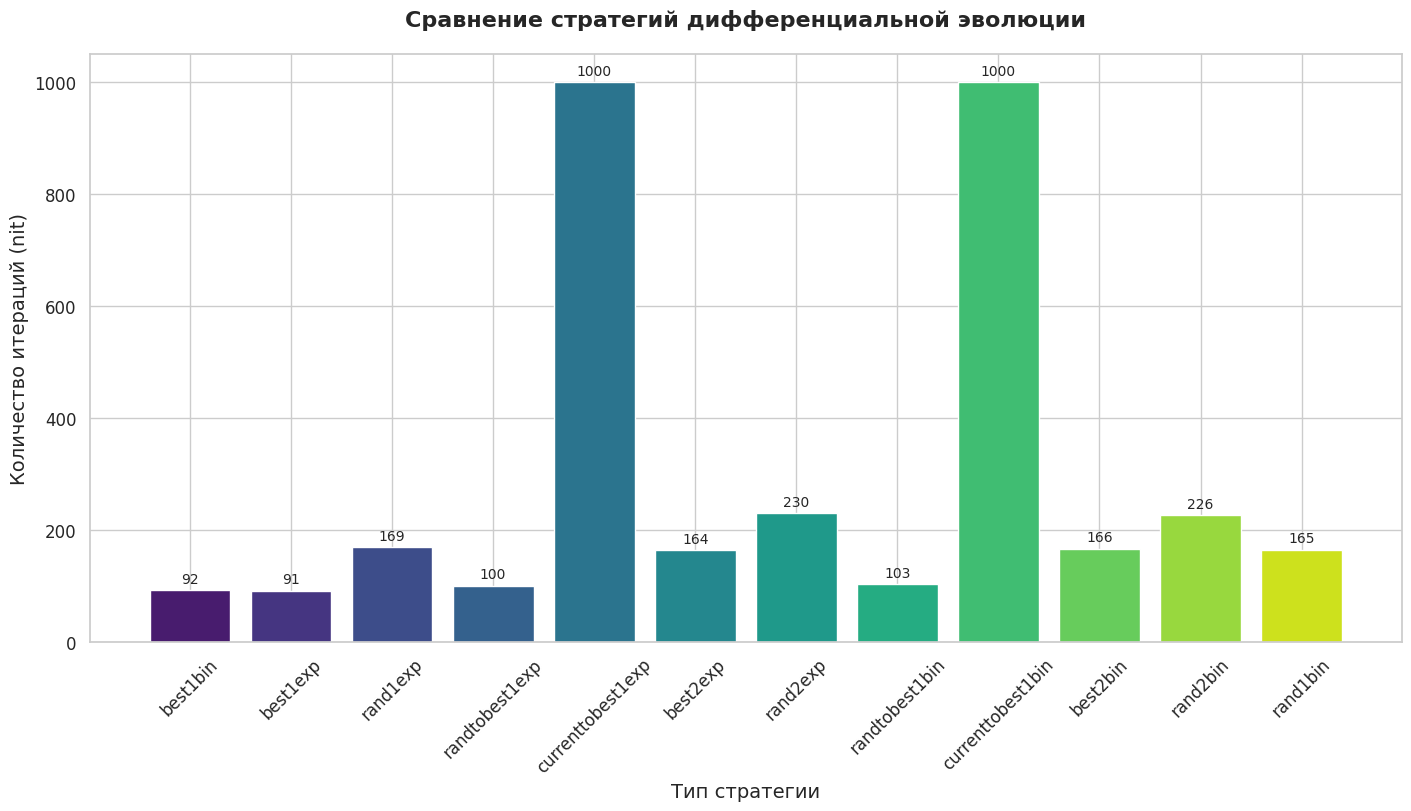

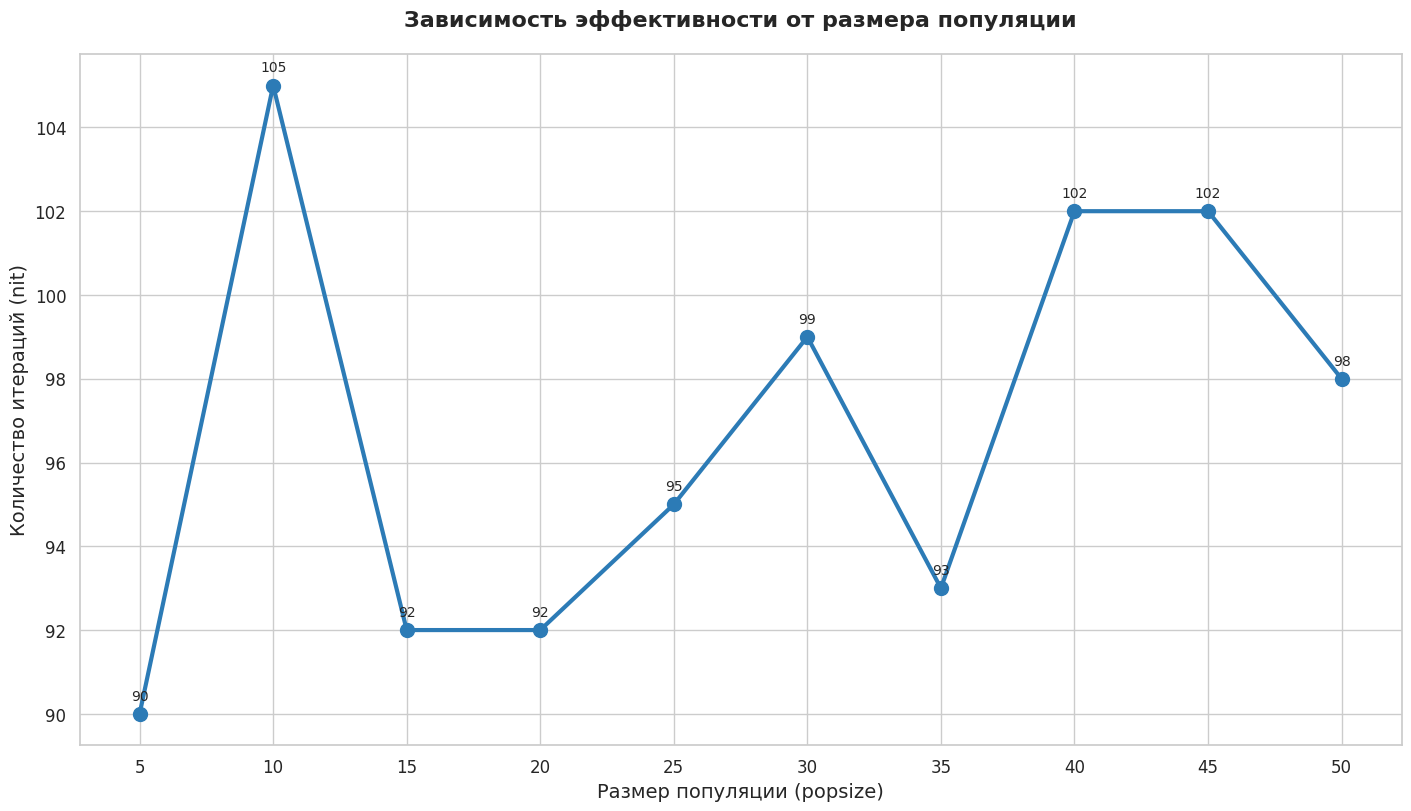

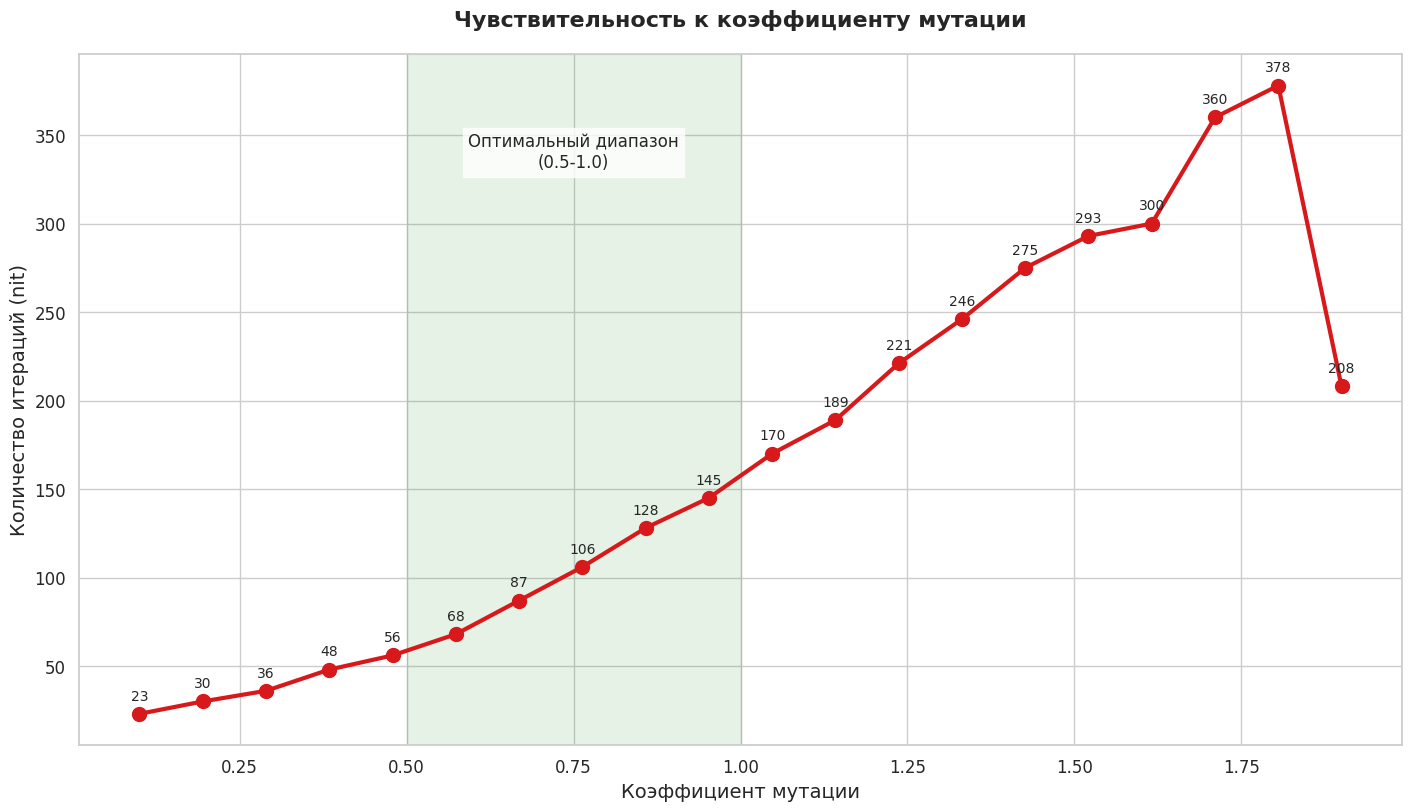

In [ ]:
# Фиксированный параметр, заданный условием задачи
seed = 42

# Настройка стилей графиков
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.figsize': (14, 8),
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.titlepad': 20,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'DejaVu Sans'
})


# 1. Сравнение стратегий оптимизации

strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
              'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin',
              'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

fig, ax = plt.subplots(constrained_layout=True)
results = [differential_evolution(ackley, bounds, strategy=s, seed=seed).nit
           for s in strategies]

palette = sns.color_palette("viridis", len(strategies))
bars = ax.bar(strategies, results, color=palette)
ax.bar_label(bars, padding=3, fontsize=10)

ax.set_title('Сравнение стратегий дифференциальной эволюции')
ax.set_xlabel('Тип стратегии')
ax.set_ylabel('Количество итераций (nit)')
ax.tick_params(axis='x', rotation=45)
plt.show()


# 2. Анализ размера популяции

popsizes = np.arange(5, 51, 5)
fig, ax = plt.subplots(constrained_layout=True)

results = [differential_evolution(ackley, bounds, popsize=p, seed=seed).nit
           for p in popsizes]

ax.plot(popsizes, results, marker='o', markersize=10,
        linewidth=3, color='#2c7bb6')

for x, y in zip(popsizes, results):
    ax.annotate(f'{y}', xy=(x, y), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=10)

ax.set_title('Зависимость эффективности от размера популяции')
ax.set_xlabel('Размер популяции (popsize)')
ax.set_ylabel('Количество итераций (nit)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


# 3. Исследование параметра мутации

mutations = np.linspace(0.1, 1.9, 20)
fig, ax = plt.subplots(constrained_layout=True)

results = [differential_evolution(ackley, bounds, mutation=m, seed=seed).nit
           for m in mutations]

ax.plot(mutations, results, marker='o', markersize=10,
        linewidth=3, color='#d7191c')
ax.axvspan(0.5, 1.0, color='green', alpha=0.1)
ax.text(0.75, max(results)*0.9, 'Оптимальный диапазон\n(0.5-1.0)',
        ha='center', va='center', fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8))

for x, y in zip(mutations, results):
    ax.annotate(f'{y}', xy=(x, y), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=10)

ax.set_title('Чувствительность к коэффициенту мутации')
ax.set_xlabel('Коэффициент мутации')
ax.set_ylabel('Количество итераций (nit)')
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

In [ ]:
from scipy.optimize import minimize
from tabulate import tabulate

# Определение функции Аккели
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# Начальное приближение
x0 = [0, 0]

# 1. Сравнение методов оптимизации
methods = ['Nelder-Mead', 'BFGS', 'L-BFGS-B', 'Powell', 'TNC', 'COBYLA']

results = []
for method in methods:
    result = minimize(ackley, x0, method=method)
    results.append({
        'Метод': method,
        'Успешность': '✅ Да' if result.success else '❌ Нет',
        'Значение целевой функции (fun)': f"{result.fun:.6g}",
        'Количество итераций (nit)': result.nit if hasattr(result, 'nit') else '-',
        'Количество вызовов функции (nfev)': result.nfev,
        'Сообщение об окончании': result.message
    })

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Вывод таблицы методов
print("1. Сравнение методов оптимизации:")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

# 2. Анализ влияния начального приближения (x0)
x0_values = [
    [0, 0], [1, 1], [-1, -1], [5, 5], [-5, -5],
    [10, 10], [-10, -10], [2, -3], [-3, 2]
]

results_x0 = []
for x0 in x0_values:
    result = minimize(ackley, x0, method='Nelder-Mead')
    results_x0.append({
        'Начальное приближение (x0)': str(x0),
        'Значение целевой функции (fun)': f"{result.fun:.6g}",
        'Количество итераций (nit)': result.nit,
        'Количество вызовов функции (nfev)': result.nfev,
        'Успешность': '✅ Да' if result.success else '❌ Нет'
    })

# Преобразование в DataFrame
results_x0_df = pd.DataFrame(results_x0)

# Вывод таблицы влияния начального приближения
print("\n2. Анализ влияния начального приближения:")
print(tabulate(results_x0_df, headers='keys', tablefmt='grid', showindex=False))

# 3. Эксперимент с параметрами метода Nelder-Mead
params = [
    {'maxiter': 100, 'maxfev': 500, 'xatol': 1e-4, 'fatol': 1e-4},
    {'maxiter': 50, 'maxfev': 200, 'xatol': 1e-6, 'fatol': 1e-6},
    {'maxiter': 200, 'maxfev': 1000, 'xatol': 1e-8, 'fatol': 1e-8}
]

results_params = []
for param in params:
    result = minimize(ackley, x0, method='Nelder-Mead', options=param)
    results_params.append({
        'Параметры': str(param),
        'Значение целевой функции (fun)': f"{result.fun:.6g}",
        'Количество итераций (nit)': result.nit,
        'Количество вызовов функции (nfev)': result.nfev,
        'Успешность': '✅ Да' if result.success else '❌ Нет'
    })

# Преобразование в DataFrame
results_params_df = pd.DataFrame(results_params)

# Вывод таблицы эксперимента с параметрами
print("\n3. Эксперимент с параметрами метода Nelder-Mead:")
print(tabulate(results_params_df, headers='keys', tablefmt='grid', showindex=False))

1. Сравнение методов оптимизации:
+-------------+--------------+----------------------------------+-----------------------------+-------------------------------------+---------------------------------------------------------------+
| Метод       | Успешность   |   Значение целевой функции (fun) | Количество итераций (nit)   |   Количество вызовов функции (nfev) | Сообщение об окончании                                        |
+=============+==============+==================================+=============================+=====================================+===============================================================+
| Nelder-Mead | ✅ Да        |                      4.44089e-16 | 8                           |                                  17 | Optimization terminated successfully.                         |
+-------------+--------------+----------------------------------+-----------------------------+-------------------------------------+------------------------------------------

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.


**Выводы**: методы, основанные на градиенте (BFGS, L-BFGS-B), плохо работают многоэкстремальными функциями, такими как функция Аккели. Методы без использования градиента (Nelder-Mead, Powell) более устойчивы для таких задач.

